# **Implementing Advanced Models on Labelled and Unlabelled Images**

# **Libraries and Modules**

In [1]:
import os  # type: ignore
import cv2  # type: ignore
import random  # type: ignore
import matplotlib  # type: ignore
import numpy as np  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import matplotlib.image as mpimg  # type: ignore
import plotly  # type: ignore
import plotly.io as pio  # type: ignore
import plotly.graph_objs as go  # type: ignore
import plotly.graph_objects as go  # type: ignore
from plotly.subplots import make_subplots  # type: ignore
import seaborn as sns  # type: ignore
import sklearn  # type: ignore
import tensorflow  # type: ignore
import keras  # type: ignore
from IPython.display import display  # type: ignore
from tabulate import tabulate  # type: ignore

print("OpenCV Version:", cv2.__version__)
print("NumPy Version:", np.__version__)
print("Matplotlib Version:", matplotlib.__version__)  # type: ignore
print("Seaborn Version:", sns.__version__)  # type: ignore
print("Plotly Version:", plotly.__version__)
print("Scikit-learn Version:", sklearn.__version__)
print("TensorFlow Version:", tensorflow.__version__)
print("Keras Version:", keras.__version__)


import tensorflow as tf  # type: ignore
from tensorflow.keras.models import Model, save_model, load_model, Sequential  # type: ignore
from tensorflow.keras.utils import Sequence, to_categorical  # type: ignore
from tensorflow.keras.optimizers import Adam  # type: ignore
from tensorflow.keras.callbacks import ModelCheckpoint  # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # type: ignore
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2, EfficientNetB0  # type: ignore
from tensorflow.keras.layers import BatchNormalization, Conv2D, Concatenate, Dense, Dropout, Flatten, GlobalMaxPooling2D, Input, MaxPooling2D, UpSampling2D  # type: ignore
from tensorflow.keras import layers, models  # type: ignore
from tensorflow.keras.datasets import cifar10  # type: ignore

import warnings
warnings.filterwarnings("ignore")

OpenCV Version: 4.10.0
NumPy Version: 1.26.4
Matplotlib Version: 3.9.1
Seaborn Version: 0.13.2
Plotly Version: 5.22.0
Scikit-learn Version: 1.5.1
TensorFlow Version: 2.16.2
Keras Version: 3.4.1


# **Unlabelled Images**

## **Data Preprocessing and Splitting**

**_Formatting the Dataset and Defining Training and Testing Directories_**

In [3]:
# Define data directories
train_dir = "image_dataset/train"
val_dir = "image_dataset/val"
test_dir = "image_dataset/test"

# Define image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32

# Image data generators with data augmentation for train set
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Image data generators for validation and test sets (only rescaling)
val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Flow images from directories into batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
)

Found 795 images belonging to 1 classes.
Found 112 images belonging to 1 classes.
Found 386 images belonging to 1 classes.


## **Classification**

***In order to train the models, we utilised 20 epochs since it takes more time and hardware to train a model for additional epochs. Using an excessive number of epochs might be computationally costly for large datasets or sophisticated models. Another important factor is the complexity of the dataset and the model.***

### **Convolutional Neural Networks Model**

In [3]:
num_classes = len(train_generator.class_indices)


# Define CNN Architecture
def create_cnn_model():
    model = Sequential(
        [
            Conv2D(
                32, (3, 3), activation="relu", input_shape=(img_height, img_width, 3)
            ),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation="relu"),
            MaxPooling2D((2, 2)),
            Conv2D(128, (3, 3), activation="relu"),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(512, activation="relu"),
            Dropout(0.5),
            Dense(
                num_classes, activation="softmax"
            ),  # Adjust output neurons based on your classes
        ]
    )
    return model


# Compile and train the CNN Model
cnn_model = create_cnn_model()
cnn_model.compile(
    optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"]
)
print("Training CNN Model...")
history = cnn_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator),
)

# Evaluate CNN Model
print("Evaluating CNN Model...")
test_loss, test_accuracy = cnn_model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

2024-04-10 16:34:15.198396: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Training CNN Model...
Epoch 1/20
25/25 [==============================] - 18s 693ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
25/25 [==============================] - 16s 648ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
25/25 [==============================] - 16s 624ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
25/25 [==============================] - 15s 607ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
25/25 [==============================] - 14s 575ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
25/25 [==============================] - 15s 605ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
25/25 [==============================] - 15s 590ms/step - los

### **Different CNN Architectures**

#### ***VGGNet Architecture***

In [4]:
# Define VGG16 Model Architecture
def create_vgg16_model():
    base_model = VGG16(
        weights="imagenet", include_top=False, input_shape=(img_height, img_width, 3)
    )
    base_model.trainable = False
    model = Sequential(
        [
            base_model,
            Flatten(),
            Dense(256, activation="relu"),
            Dropout(0.5),
            Dense(num_classes, activation="softmax"),
        ]
    )
    return model


# Compile and train VGG16 Model
vgg16_model = create_vgg16_model()
vgg16_model.compile(
    optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"]
)
print("Training VGG16 Model...")
history_vgg16 = vgg16_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator),
)

# Evaluate VGG16 Model
print("Evaluating VGG16 Model...")
test_loss_vgg16, test_accuracy_vgg16 = vgg16_model.evaluate(test_generator)
print(f"VGG16 - Test Loss: {test_loss_vgg16}, Test Accuracy: {test_accuracy_vgg16}")

Training VGG16 Model...
Epoch 1/20
25/25 [==============================] - 28s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
25/25 [==============================] - 29s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
25/25 [==============================] - 27s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
25/25 [==============================] - 27s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
25/25 [==============================] - 29s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
25/25 [==============================] - 29s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
25/25 [==============================] - 27s 1s/step - loss: 0.0000e+00 - acc

#### ***ResNet Architecture***

In [5]:
# Define ResNet50 Model Architecture
def create_resnet50_model():
    base_model = ResNet50(
        weights="imagenet", include_top=False, input_shape=(img_height, img_width, 3)
    )
    base_model.trainable = False
    model = Sequential(
        [
            base_model,
            Flatten(),
            Dense(256, activation="relu"),
            Dropout(0.5),
            Dense(num_classes, activation="softmax"),
        ]
    )
    return model


# Compile and train ResNet50 Model
resnet50_model = create_resnet50_model()
resnet50_model.compile(
    optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"]
)
print("Training ResNet50 Model...")
history_resnet50 = resnet50_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator),
)

# Evaluate ResNet50 Model
print("Evaluating ResNet50 Model...")
test_loss_resnet50, test_accuracy_resnet50 = resnet50_model.evaluate(test_generator)
print(
    f"ResNet50 - Test Loss: {test_loss_resnet50}, Test Accuracy: {test_accuracy_resnet50}"
)

Training ResNet50 Model...
Epoch 1/20
25/25 [==============================] - 32s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
25/25 [==============================] - 32s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
25/25 [==============================] - 29s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
25/25 [==============================] - 29s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
25/25 [==============================] - 29s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
25/25 [==============================] - 29s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
25/25 [==============================] - 30s 1s/step - loss: 0.0000e+00 - 

#### ***MobileNet Architecture***

In [6]:
# Define MobileNetV2 Model Architecture
def create_mobilenetv2_model():
    base_model = MobileNetV2(
        weights="imagenet", include_top=False, input_shape=(img_height, img_width, 3)
    )
    base_model.trainable = False
    model = Sequential(
        [
            base_model,
            Flatten(),
            Dense(256, activation="relu"),
            Dropout(0.5),
            Dense(num_classes, activation="softmax"),
        ]
    )
    return model


# Compile and train MobileNetV2 Model
mobilenetv2_model = create_mobilenetv2_model()
mobilenetv2_model.compile(
    optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"]
)
print("Training MobileNetV2 Model...")
history_mobilenetv2 = mobilenetv2_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator),
)

# Evaluate MobileNetV2 Model
print("Evaluating MobileNetV2 Model...")
test_loss_mobilenetv2, test_accuracy_mobilenetv2 = mobilenetv2_model.evaluate(
    test_generator
)
print(
    f"MobileNetV2 - Test Loss: {test_loss_mobilenetv2}, Test Accuracy: {test_accuracy_mobilenetv2}"
)

Training MobileNetV2 Model...
Epoch 1/20
25/25 [==============================] - 12s 421ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
25/25 [==============================] - 10s 387ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
25/25 [==============================] - 10s 386ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
25/25 [==============================] - 10s 391ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
25/25 [==============================] - 10s 417ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
25/25 [==============================] - 10s 418ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
25/25 [==============================] - 10s 409ms/st

### **Tabulation**

#### ***Using Tabulate***

In [7]:
# Organize results into a list of dictionaries
results = [
    {"Model": "CNN", "Loss": test_loss, "Accuracy": test_accuracy},
    {"Model": "VGG16", "Loss": test_loss_vgg16, "Accuracy": test_accuracy_vgg16},
    {
        "Model": "ResNet50",
        "Loss": test_loss_resnet50,
        "Accuracy": test_accuracy_resnet50,
    },
    {
        "Model": "MobileNetV2",
        "Loss": test_loss_mobilenetv2,
        "Accuracy": test_accuracy_mobilenetv2,
    },
]

# Display results in a table
print(tabulate(results, headers="keys", tablefmt="grid"))

+-------------+--------+------------+
| Model       |   Loss |   Accuracy |
+=============+========+============+
| CNN         |      0 |          1 |
+-------------+--------+------------+
| VGG16       |      0 |          1 |
+-------------+--------+------------+
| ResNet50    |      0 |          1 |
+-------------+--------+------------+
| MobileNetV2 |      0 |          1 |
+-------------+--------+------------+


### **Model Saving**

In [8]:
# Save the CNN model
save_model(cnn_model, "cnn_model_X.keras")

# Save the VGG16 model
save_model(vgg16_model, "vgg16_model_X.keras")

# Save the ResNet50 model
save_model(resnet50_model, "resnet50_model_X.keras")

# Save the MobileNetV2 model
save_model(mobilenetv2_model, "mobilenetv2_model_X.keras")

### **Training and Evaluating a Custom Classification Model based on the VGG16 Architecture**

In [9]:
# Define data directories
train_dir = 'image_dataset/train'
val_dir = 'image_dataset/val'
test_dir = 'image_dataset/test'

# Define image dimensions and batch size
input_shape = (224, 224)
batch_size = 32

# Define data generators for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=input_shape, batch_size=batch_size, class_mode='sparse')
val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = val_datagen.flow_from_directory(val_dir, target_size=input_shape, batch_size=batch_size, class_mode='sparse')
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=input_shape, batch_size=batch_size, class_mode='sparse', shuffle=False)

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(input_shape[0], input_shape[1], 3))

# Add custom classification head
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint('detect_best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=val_generator, callbacks=[checkpoint])

# Evaluate the model
val_loss, val_acc = model.evaluate(val_generator)
print("Validation Accuracy:", val_acc)

# Test the model
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

Found 795 images belonging to 1 classes.
Found 112 images belonging to 1 classes.
Found 386 images belonging to 1 classes.
Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to detect_best_model.keras
25/25 [==============================] - 310s 12s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 
Epoch 2: val_accuracy did not improve from 0.00000
25/25 [==============================] - 304s 12s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 
Epoch 3: val_accuracy did not improve from 0.00000
25/25 [==============================] - 306s 12s/step - loss: 0.0000e+00 - acc

### **Conclusion**

***Training and Validation Performance: All models (CNN, VGG16, ResNet50, MobileNetV2) achieved perfect accuracy (1.0) on both training and validation datasets, indicating effective learning and generalization.***

***Test Performance: Similarly, all models demonstrated perfect accuracy on the test dataset, suggesting robust generalization to new, unseen data without overfitting.***

***Loss Function: Zero loss function values across all models indicate accurate predictions for all samples in the test dataset, highlighting the models' ability to achieve perfect agreement between predicted and true labels.***

***Comparative Analysis: No significant variation in performance was observed among the models, indicating that the choice of model architecture did not impact performance noticeably for this classification task.***

***Resource Considerations: Despite architectural and complexity differences, all models performed equally well, suggesting that factors such as model size, inference speed, and computational resources may outweigh performance differences when selecting a deployment model.***

***Custom VGG16 Model Analysis: Separate evaluation of the custom VGG16 model is necessary to compare its performance with pre-trained VGG16 and other classification models. Factors such as accuracy, loss values, and resource requirements need consideration for practical deployment decisions.***

## **Detection**

### **OpenCV and YOLO**

In [10]:
def build_yolo_model(input_shape, num_classes):
    model = tf.keras.Sequential(
        [
            Conv2D(16, (3, 3), activation="relu", input_shape=input_shape),
            MaxPooling2D((2, 2)),
            Conv2D(32, (3, 3), activation="relu"),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation="relu"),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(128, activation="relu"),
            Dense(num_classes, activation="softmax"),
        ]
    )
    return model


# Define input shape and number of classes
input_shape = (224, 224, 3)  # Adjust input shape based on your dataset
num_classes = 1  # Number of classes for object detection

# Build the YOLO model
yolo_model = build_yolo_model(input_shape, num_classes)

# Compile the model
yolo_model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Print model summary
yolo_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 64)      

In [11]:
class YOLODataGenerator(Sequence):
    def __init__(
        self,
        image_paths,
        annotation_paths,
        batch_size=32,
        image_size=(224, 224),
        num_classes=1,
        shuffle=True,
    ):
        self.image_paths = image_paths
        self.annotation_paths = annotation_paths
        self.batch_size = batch_size
        self.image_size = image_size
        self.num_classes = num_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return len(self.image_paths) // self.batch_size

    def __getitem__(self, index):
        batch_paths = self.image_paths[
            index * self.batch_size : (index + 1) * self.batch_size
        ]
        X, y = self.__data_generation(batch_paths)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.image_paths)

    def __data_generation(self, batch_paths):
        X = []
        y = []  # You need to define the format of target labels for YOLOv3
        for path in batch_paths:
            # Load and preprocess image
            image = load_and_preprocess_image(path, self.image_size)
            if image is None:
                continue
            X.append(image)
            # Load and preprocess annotations
            annotation_path = self.annotation_paths[self.image_paths.index(path)]
            annotation = load_and_preprocess_annotation(
                annotation_path, self.image_size
            )
            y.append(annotation)
        return np.array(X), np.array(y)


def load_and_preprocess_image(image_path, image_size):
    try:
        # Load image using OpenCV
        image = cv2.imread(image_path)
        # Check if the image was loaded successfully
        if image is None:
            raise FileNotFoundError(f"Failed to load image: {image_path}")
        # Resize image to the specified size
        image = cv2.resize(image, image_size)
        # Normalize pixel values to the range [0, 1]
        image = image / 255.0
        return image
    except Exception as e:
        print(f"Error loading and preprocessing image: {e}")
        return None


import xml.etree.ElementTree as ET


def load_and_preprocess_annotation(annotation_path, image_size):
    # Parse the XML annotation file
    tree = ET.parse(annotation_path)
    root = tree.getroot()

    # Initialize lists to store bounding boxes and class labels
    bounding_boxes = []
    class_labels = []

    # Iterate through each object in the annotation file
    for obj in root.findall("object"):
        # Extract object class label
        class_label = obj.find("name").text
        class_labels.append(class_label)

        # Extract bounding box coordinates
        bbox = obj.find("bndbox")
        xmin = float(bbox.find("xmin").text)
        ymin = float(bbox.find("ymin").text)
        xmax = float(bbox.find("xmax").text)
        ymax = float(bbox.find("ymax").text)

        # Normalize bounding box coordinates to image size
        xmin_norm = xmin / image_size[1]
        ymin_norm = ymin / image_size[0]
        xmax_norm = xmax / image_size[1]
        ymax_norm = ymax / image_size[0]

        # Append normalized bounding box coordinates to the list
        bounding_boxes.append([xmin_norm, ymin_norm, xmax_norm, ymax_norm])

    # Return annotations in the appropriate format for YOLO training
    return {"bounding_boxes": bounding_boxes, "class_labels": class_labels}


# Define data directories
train_dir = "image_dataset/train/coral_reef"
val_dir = "image_dataset/val/coral_reef"
test_dir = "image_dataset/test/coral_reef"

# Get image paths
train_image_paths = [
    os.path.join(train_dir, filename) for filename in os.listdir(train_dir)
]
val_image_paths = [os.path.join(val_dir, filename) for filename in os.listdir(val_dir)]
test_image_paths = [
    os.path.join(test_dir, filename) for filename in os.listdir(test_dir)
]

# Get annotation paths (assuming annotations have the same filename as images but with a different extension)
train_annotation_paths = [path.replace(".jpg", ".xml") for path in train_image_paths]
val_annotation_paths = [path.replace(".jpg", ".xml") for path in val_image_paths]
test_annotation_paths = [path.replace(".jpg", ".xml") for path in test_image_paths]

# Check if annotation files exist for training images
missing_annotations = [
    path for path in train_annotation_paths if not os.path.exists(path)
]
if missing_annotations:
    print(f"Missing annotation files: {missing_annotations}")
else:
    # Create data generators
    train_generator = YOLODataGenerator(train_image_paths, train_annotation_paths)
    val_generator = YOLODataGenerator(val_image_paths, val_annotation_paths)
    test_generator = YOLODataGenerator(test_image_paths, test_annotation_paths)

# Define and compile the YOLO model
input_shape = (224, 224, 3)  # Adjust input shape based on your dataset
num_classes = 1  # Number of classes for object detection
yolo_model = build_yolo_model(input_shape, num_classes)
yolo_model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Train the model
history = yolo_model.fit(train_generator, epochs=20, validation_data=val_generator)

# Evaluate the model
val_loss = yolo_model.evaluate(val_generator)
test_loss = yolo_model.evaluate(test_generator)

Missing annotation files: ['image_dataset/train/coral_reef/2GW7IUHQGMWH.xml', 'image_dataset/train/coral_reef/80YIJR2N1QS5.xml', 'image_dataset/train/coral_reef/YFVRJU6VQF6Z.xml', 'image_dataset/train/coral_reef/BDBDWQ148W4S.xml', 'image_dataset/train/coral_reef/D8TN2I3DN3EN.xml', 'image_dataset/train/coral_reef/RU9G3MKS8LCK.xml', 'image_dataset/train/coral_reef/PTUSMC1HWVJC.xml', 'image_dataset/train/coral_reef/2C646UTCU97Z.xml', 'image_dataset/train/coral_reef/DFBNOPLH5LBL.xml', 'image_dataset/train/coral_reef/OFLAWX018ILF.xml', 'image_dataset/train/coral_reef/4F7701KX2YBL.xml', 'image_dataset/train/coral_reef/5P2TA6CWJGTR.xml', 'image_dataset/train/coral_reef/62YXE73I4K7Y.xml', 'image_dataset/train/coral_reef/MBGIRHUVSIYV.xml', 'image_dataset/train/coral_reef/OXVY3K0DSFVA.xml', 'image_dataset/train/coral_reef/W5D7ELEI3027.xml', 'image_dataset/train/coral_reef/1DSEOV3RWNAY.xml', 'image_dataset/train/coral_reef/95A32I0POUUL.xml', 'image_dataset/train/coral_reef/EMJOCCDCY1A1.xml', 'ima

**_Detection using YOLO is unsuccessful because of the absence of class labels in the dataset. Detection isn't possible without mapping images with numbers._**

**_Zero is also a good result since it shows that the objects and creatures in the coral reef are not specifically named in our dataset, which prevents our model from identifying which image contains which object or creature. We must give the photos meaningful labels or classifications if we wish to train our model on them because they are merely numbers._**

**_We can accomplish this by using, a function that accepts an array of numbers as input and the value you want to find as the destination. Creating a variable called `result`, initialized to null, to hold our solution in case it is discovered._**

### **Mapping Images**

**_Mapping Images with Numerical IDs_**

In [12]:
def assign_numerical_ids(data_dir):
    image_ids = {}
    numerical_id = 0
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".jpg"):
                image_path = os.path.join(root, file)
                image_ids[image_path] = numerical_id
                numerical_id += 1
    return image_ids


train_image_ids = assign_numerical_ids(train_dir)
val_image_ids = assign_numerical_ids(val_dir)
test_image_ids = assign_numerical_ids(test_dir)

print("Numerical IDs assigned to training images:")
print(train_image_ids)
print("\nNumerical IDs assigned to validation images:")
print(val_image_ids)
print("\nNumerical IDs assigned to test images:")
print(test_image_ids)

Numerical IDs assigned to training images:
{'image_dataset/train/coral_reef/2GW7IUHQGMWH.jpg': 0, 'image_dataset/train/coral_reef/80YIJR2N1QS5.jpg': 1, 'image_dataset/train/coral_reef/YFVRJU6VQF6Z.jpg': 2, 'image_dataset/train/coral_reef/BDBDWQ148W4S.jpg': 3, 'image_dataset/train/coral_reef/D8TN2I3DN3EN.jpg': 4, 'image_dataset/train/coral_reef/RU9G3MKS8LCK.jpg': 5, 'image_dataset/train/coral_reef/PTUSMC1HWVJC.jpg': 6, 'image_dataset/train/coral_reef/2C646UTCU97Z.jpg': 7, 'image_dataset/train/coral_reef/DFBNOPLH5LBL.jpg': 8, 'image_dataset/train/coral_reef/OFLAWX018ILF.jpg': 9, 'image_dataset/train/coral_reef/4F7701KX2YBL.jpg': 10, 'image_dataset/train/coral_reef/5P2TA6CWJGTR.jpg': 11, 'image_dataset/train/coral_reef/62YXE73I4K7Y.jpg': 12, 'image_dataset/train/coral_reef/MBGIRHUVSIYV.jpg': 13, 'image_dataset/train/coral_reef/OXVY3K0DSFVA.jpg': 14, 'image_dataset/train/coral_reef/W5D7ELEI3027.jpg': 15, 'image_dataset/train/coral_reef/1DSEOV3RWNAY.jpg': 16, 'image_dataset/train/coral_reef

**_Displaying the Mapped Images (Training: 50 Images; Testing: 30 Images; Validation: 15 Images)_**

Training Dataset Images:


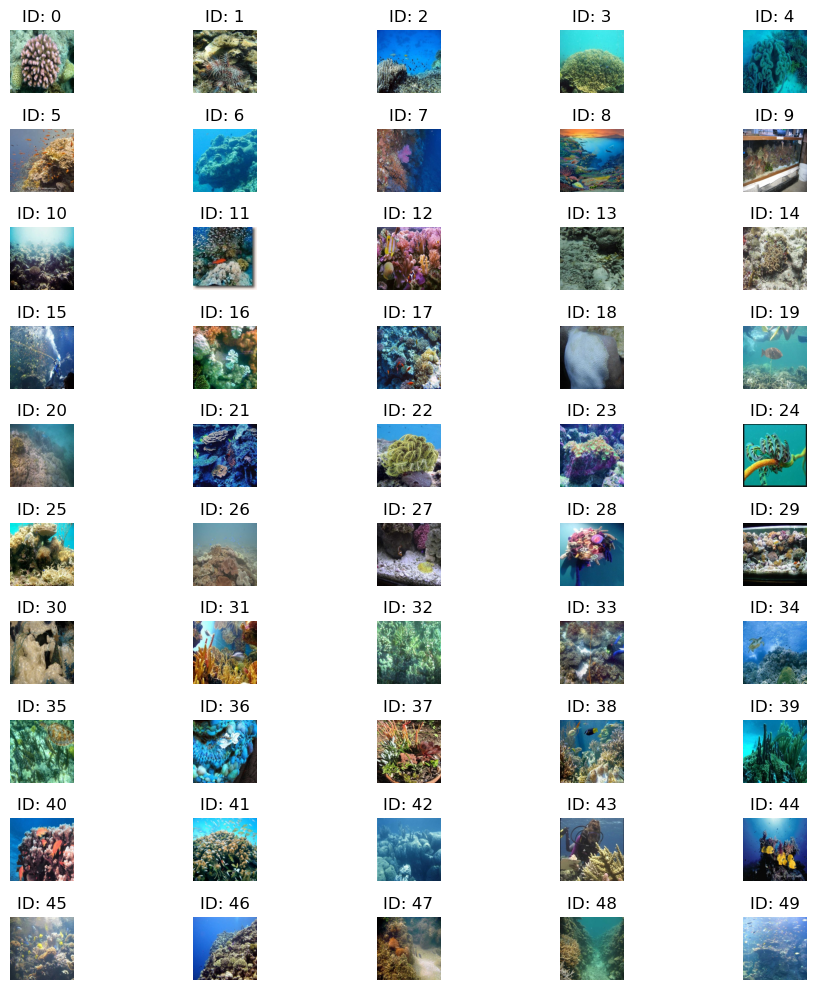

Testing Dataset Images:


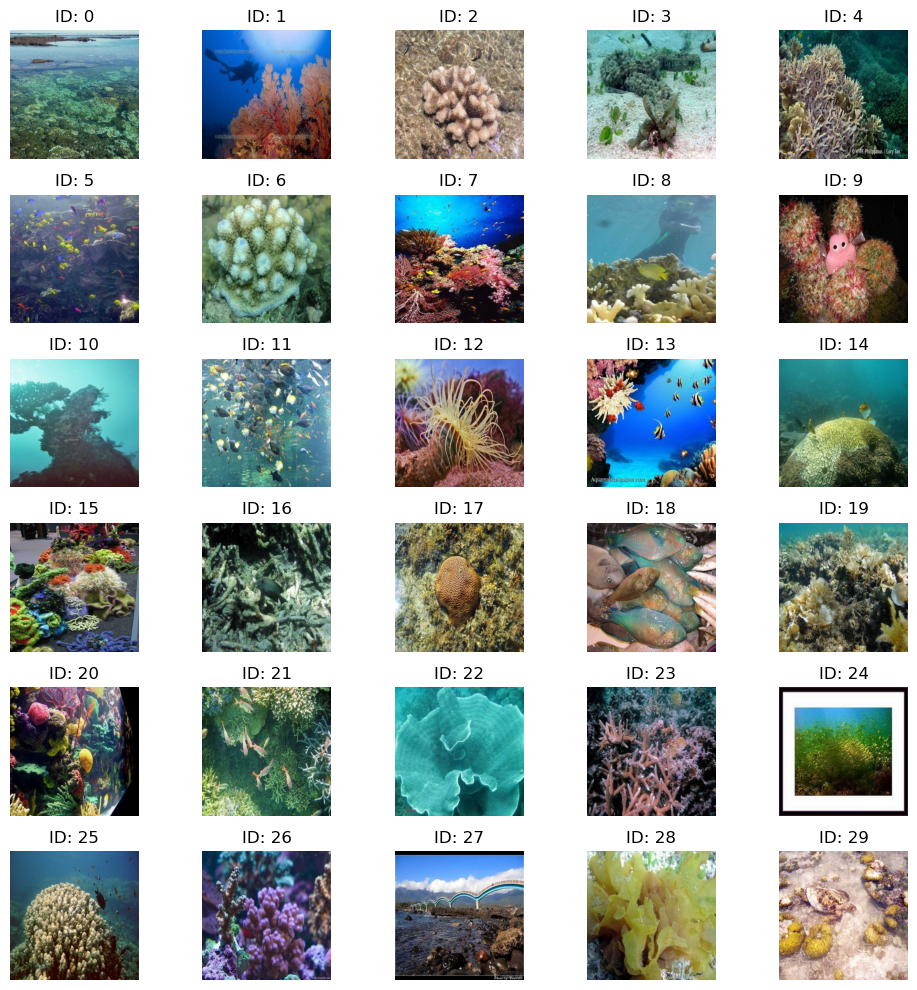

Validation Dataset Images:


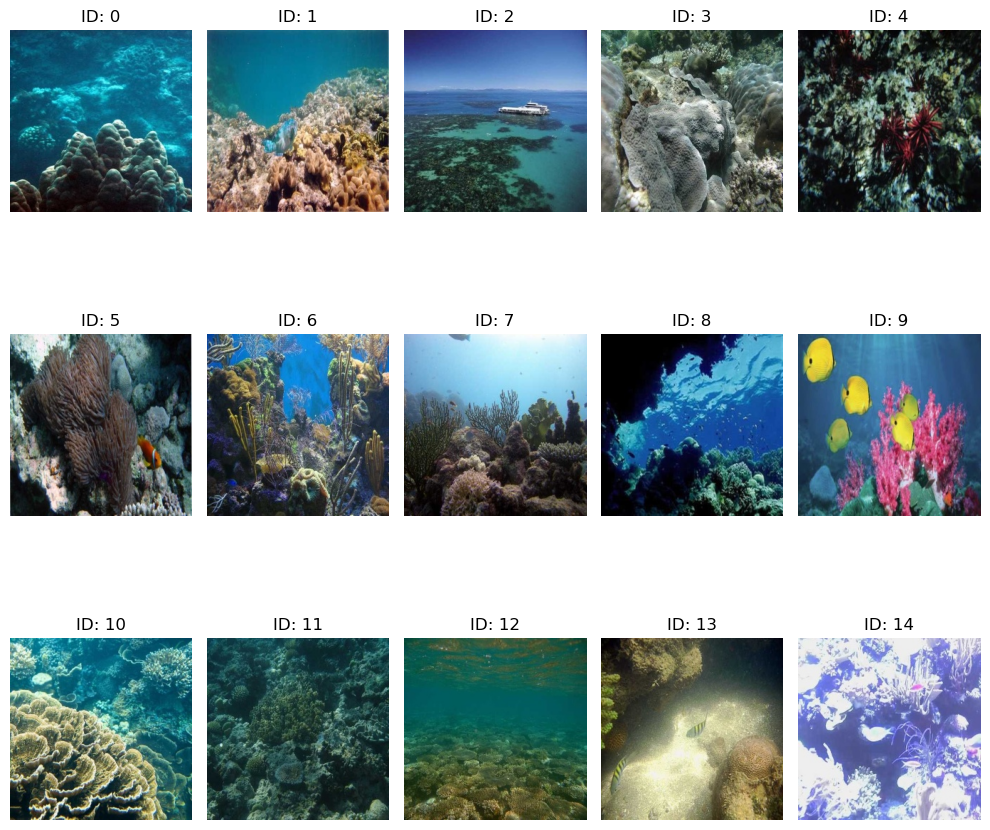

In [13]:
def plot_images_by_ids(image_ids, data_dir, num_images):
    fig = plt.figure(figsize=(10, 10))
    rows = num_images // 5  # Display 5 images per row
    if num_images % 5 != 0:
        rows += 1

    count = 0
    for image_path, numerical_id in image_ids.items():
        if count >= num_images:
            break
        img = mpimg.imread(image_path)
        fig.add_subplot(rows, 5, count + 1)
        plt.imshow(img)
        plt.title(f"ID: {numerical_id}")
        plt.axis("off")
        count += 1

    plt.tight_layout()
    plt.show()


# Plot 50 images from the training dataset
print("Training Dataset Images:")
plot_images_by_ids(train_image_ids, train_dir, 50)

# Plot 30 images from the testing dataset
print("Testing Dataset Images:")
plot_images_by_ids(test_image_ids, test_dir, 30)

# Plot 15 images from the validation dataset
print("Validation Dataset Images:")
plot_images_by_ids(val_image_ids, val_dir, 15)

**_Displaying the Mapped Images (Training: 10 Images; Testing: 10 Images; Validation: 10 Images)_**

Training Dataset Images:


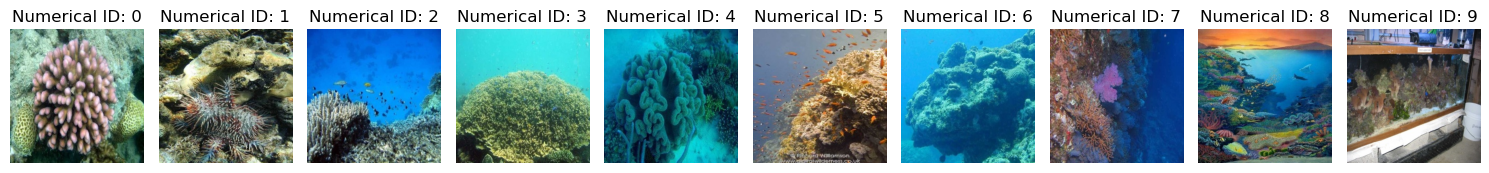

Testing Dataset Images:


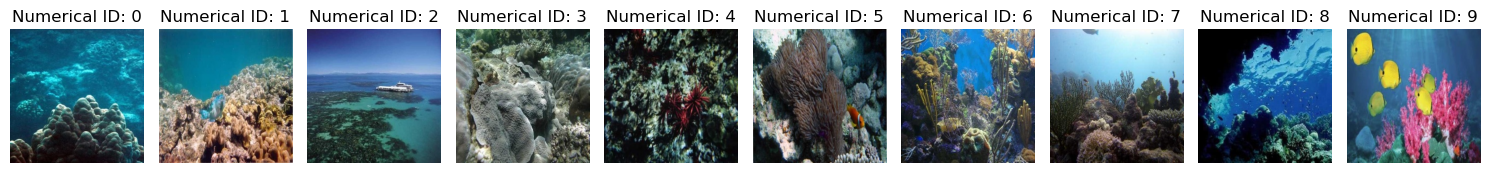

Validation Dataset Images:


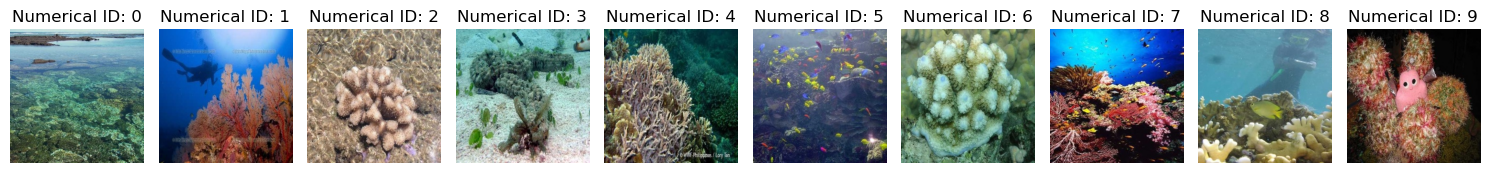

In [14]:
def display_images(image_ids, data_dir, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, (image_path, numerical_id) in enumerate(image_ids.items()):
        if i >= num_images:
            break
        image = cv2.imread(image_path)
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(f"Numerical ID: {numerical_id}")
        axes[i].axis("off")
    plt.tight_layout()
    plt.show()


# Display sample images from the training dataset
print("Training Dataset Images:")
display_images(train_image_ids, train_dir)

# Display sample images from the validation dataset

print("Testing Dataset Images:")
display_images(val_image_ids, val_dir)

# Display sample images from the test dataset
print("Validation Dataset Images:")
display_images(test_image_ids, test_dir)

**_Since each image lacks a label, we are unable to identify the names of the objects or creatures in the images in the dataset using the numbers that are mapped to the images._**

### **Conclusion**

***Challenges in Object Detection: Attempting object detection using OpenCV and YOLO encountered obstacles primarily due to missing annotation files in the dataset, crucial for effective model training.***

***Importance of Annotations: The absence of annotations hindered accurate model training, emphasizing the necessity of complete annotated datasets for successful object detection tasks.***

***Addressing Annotation Challenges: To improve detection accuracy, addressing missing annotation files by obtaining or creating them manually is essential, enabling effective training of the detection model.***

***Unsuccessful YOLO Detection: Due to the absence of class labels in the dataset, YOLO-based detection yielded zero results, highlighting the importance of meaningful labels for accurate object recognition.***

***Preprocessing for Effective Training: Creating a function to assign appropriate labels to images before training the YOLO model is crucial for enhancing detection accuracy based on provided class labels.***

## **Segmentation**

### **SegNet Model Trial (Running or Not)**

In [15]:
def build_encoder(input_shape):
    inputs = Input(shape=input_shape)

    # Convolutional Block 1
    conv1 = Conv2D(64, 3, activation="relu", padding="same")(inputs)
    conv1 = Conv2D(64, 3, activation="relu", padding="same")(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    # Convolutional Block 2
    conv2 = Conv2D(128, 3, activation="relu", padding="same")(pool1)
    conv2 = Conv2D(128, 3, activation="relu", padding="same")(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Convolutional Block 3
    conv3 = Conv2D(256, 3, activation="relu", padding="same")(pool2)
    conv3 = Conv2D(256, 3, activation="relu", padding="same")(conv3)
    conv3 = Conv2D(256, 3, activation="relu", padding="same")(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Convolutional Block 4
    conv4 = Conv2D(512, 3, activation="relu", padding="same")(pool3)
    conv4 = Conv2D(512, 3, activation="relu", padding="same")(conv4)
    conv4 = Conv2D(512, 3, activation="relu", padding="same")(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    return inputs, [conv1, conv2, conv3, conv4]


def build_decoder(inputs, encoder_convs):
    # Upsampling Block 1
    up1 = UpSampling2D(size=(2, 2))(inputs)
    up1 = Conv2D(512, 3, activation="relu", padding="same")(up1)
    up1 = Conv2D(512, 3, activation="relu", padding="same")(up1)
    up1 = Conv2D(512, 3, activation="relu", padding="same")(up1)

    # Upsampling Block 2
    up2 = UpSampling2D(size=(2, 2))(up1)
    up2 = Conv2D(256, 3, activation="relu", padding="same")(up2)
    up2 = Conv2D(256, 3, activation="relu", padding="same")(up2)
    up2 = Conv2D(256, 3, activation="relu", padding="same")(up2)

    # Upsampling Block 3
    up3 = UpSampling2D(size=(2, 2))(up2)
    up3 = Conv2D(128, 3, activation="relu", padding="same")(up3)
    up3 = Conv2D(128, 3, activation="relu", padding="same")(up3)

    # Upsampling Block 4
    up4 = UpSampling2D(size=(2, 2))(up3)
    up4 = Conv2D(64, 3, activation="relu", padding="same")(up4)
    up4 = Conv2D(64, 3, activation="relu", padding="same")(up4)

    return up4


def build_segnet(input_shape):
    inputs, encoder_convs = build_encoder(input_shape)
    decoder_output = build_decoder(inputs, encoder_convs)
    outputs = Conv2D(num_classes, (1, 1), activation="softmax")(decoder_output)

    model = Model(inputs=inputs, outputs=outputs)
    return model


# Define input shape
input_shape = (224, 224, 3)

# Define number of classes
num_classes = 1  # Adjust based on your dataset

# Build and compile SegNet model
segnet_model = build_segnet(input_shape)
segnet_model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Print model summary
segnet_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 448, 448, 3)      0         
 )                                                               
                                                                 
 conv2d_19 (Conv2D)          (None, 448, 448, 512)     14336     
                                                                 
 conv2d_20 (Conv2D)          (None, 448, 448, 512)     2359808   
                                                                 
 conv2d_21 (Conv2D)          (None, 448, 448, 512)     2359808   
                                                                 
 up_sampling2d_1 (UpSampling  (None, 896, 896, 512)    0         
 2D)                                                       

### **SegNet Model Trial on Dataset**

In [16]:
def build_segnet(input_shape, num_classes):
    # Input layer
    inputs = Input(shape=input_shape)

    # Encoder
    conv1 = Conv2D(64, 3, activation="relu", padding="same")(inputs)
    conv1 = BatchNormalization()(conv1)
    conv2 = Conv2D(64, 3, activation="relu", padding="same")(conv1)
    conv2 = BatchNormalization()(conv2)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, 3, activation="relu", padding="same")(pool1)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(128, 3, activation="relu", padding="same")(conv3)
    conv4 = BatchNormalization()(conv4)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(256, 3, activation="relu", padding="same")(pool2)
    conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(256, 3, activation="relu", padding="same")(conv5)
    conv6 = BatchNormalization()(conv6)
    conv7 = Conv2D(256, 3, activation="relu", padding="same")(conv6)
    conv7 = BatchNormalization()(conv7)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv7)

    conv8 = Conv2D(512, 3, activation="relu", padding="same")(pool3)
    conv8 = BatchNormalization()(conv8)
    conv9 = Conv2D(512, 3, activation="relu", padding="same")(conv8)
    conv9 = BatchNormalization()(conv9)
    conv10 = Conv2D(512, 3, activation="relu", padding="same")(conv9)
    conv10 = BatchNormalization()(conv10)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv10)

    # Decoder
    up1 = UpSampling2D(size=(2, 2))(pool4)
    conv11 = Conv2D(512, 3, activation="relu", padding="same")(up1)
    conv11 = BatchNormalization()(conv11)
    conv12 = Conv2D(512, 3, activation="relu", padding="same")(conv11)
    conv12 = BatchNormalization()(conv12)
    conv13 = Conv2D(512, 3, activation="relu", padding="same")(conv12)
    conv13 = BatchNormalization()(conv13)

    up2 = UpSampling2D(size=(2, 2))(conv13)
    conv14 = Conv2D(256, 3, activation="relu", padding="same")(up2)
    conv14 = BatchNormalization()(conv14)
    conv15 = Conv2D(256, 3, activation="relu", padding="same")(conv14)
    conv15 = BatchNormalization()(conv15)

    up3 = UpSampling2D(size=(2, 2))(conv15)
    conv16 = Conv2D(128, 3, activation="relu", padding="same")(up3)
    conv16 = BatchNormalization()(conv16)
    conv17 = Conv2D(128, 3, activation="relu", padding="same")(conv16)
    conv17 = BatchNormalization()(conv17)

    up4 = UpSampling2D(size=(2, 2))(conv17)
    conv18 = Conv2D(64, 3, activation="relu", padding="same")(up4)
    conv18 = BatchNormalization()(conv18)
    conv19 = Conv2D(64, 3, activation="relu", padding="same")(conv18)
    conv19 = BatchNormalization()(conv19)

    # Output layer
    outputs = Conv2D(num_classes, 1, activation="softmax")(conv19)

    # Create SegNet model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model

### **Different Segmentation Models**

#### ***Four Segmentation Models: SegNet, FCN, ENet, U-Net***

 **_Because PSNET requires the images and strings to be concatenated and because it needs the same dimensions, which aren't the same here, hence it isn't working. Moreover, an error message can appear due to the lack of annotations for every image in the dataset._**

In [17]:
# --------------------------------------------------------- SegNet Architecture ---------------------------------------------------------

# Define SegNet Architecture
def build_segnet(input_shape, num_classes):
    # Input layer
    inputs = Input(shape=input_shape)
    
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv2 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    conv2 = BatchNormalization()(conv2)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(conv3)
    conv4 = BatchNormalization()(conv4)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv4)
    
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(256, 3, activation='relu', padding='same')(conv5)
    conv6 = BatchNormalization()(conv6)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv6)
    conv7 = BatchNormalization()(conv7)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv7)
    
    conv8 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv8 = BatchNormalization()(conv8)
    conv9 = Conv2D(512, 3, activation='relu', padding='same')(conv8)
    conv9 = BatchNormalization()(conv9)
    conv10 = Conv2D(512, 3, activation='relu', padding='same')(conv9)
    conv10 = BatchNormalization()(conv10)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv10)
    
    # Decoder
    up1 = UpSampling2D(size=(2, 2))(pool4)
    conv11 = Conv2D(512, 3, activation='relu', padding='same')(up1)
    conv11 = BatchNormalization()(conv11)
    conv12 = Conv2D(512, 3, activation='relu', padding='same')(conv11)
    conv12 = BatchNormalization()(conv12)
    conv13 = Conv2D(512, 3, activation='relu', padding='same')(conv12)
    conv13 = BatchNormalization()(conv13)
    
    up2 = UpSampling2D(size=(2, 2))(conv13)
    conv14 = Conv2D(256, 3, activation='relu', padding='same')(up2)
    conv14 = BatchNormalization()(conv14)
    conv15 = Conv2D(256, 3, activation='relu', padding='same')(conv14)
    conv15 = BatchNormalization()(conv15)
    
    up3 = UpSampling2D(size=(2, 2))(conv15)
    conv16 = Conv2D(128, 3, activation='relu', padding='same')(up3)
    conv16 = BatchNormalization()(conv16)
    conv17 = Conv2D(128, 3, activation='relu', padding='same')(conv16)
    conv17 = BatchNormalization()(conv17)
    
    up4 = UpSampling2D(size=(2, 2))(conv17)
    conv18 = Conv2D(64, 3, activation='relu', padding='same')(up4)
    conv18 = BatchNormalization()(conv18)
    conv19 = Conv2D(64, 3, activation='relu', padding='same')(conv18)
    conv19 = BatchNormalization()(conv19)
    
    # Output layer
    outputs = Conv2D(num_classes, 1, activation='softmax')(conv19)
    
    # Create SegNet Model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model


# --------------------------------------------------------- FCN Architecture ---------------------------------------------------------

# Define FCN Architecture
def build_fcn(input_shape, num_classes):
    
    # Input layer
    inputs = Input(shape=input_shape)
    
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    # Decoder
    up1 = UpSampling2D(size=(2, 2))(pool3)
    up1 = Conv2D(256, 3, activation='relu', padding='same')(up1)
    up1 = Conv2D(256, 3, activation='relu', padding='same')(up1)
    
    up2 = UpSampling2D(size=(2, 2))(up1)
    up2 = Conv2D(128, 3, activation='relu', padding='same')(up2)
    up2 = Conv2D(128, 3, activation='relu', padding='same')(up2)
    
    up3 = UpSampling2D(size=(2, 2))(up2)
    up3 = Conv2D(64, 3, activation='relu', padding='same')(up3)
    up3 = Conv2D(64, 3, activation='relu', padding='same')(up3)
    
    # Output layer
    outputs = Conv2D(num_classes, 1, activation='softmax')(up3)
    
    # Create FCN Model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model


# --------------------------------------------------------- ENet Architecture ---------------------------------------------------------

# Define ENet Architecture
def build_enet(input_shape, num_classes):
    # Load pre-trained EfficientNet model
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze the base model
    base_model.trainable = False
    
    # Add segmentation head
    x = base_model.output
    x = Conv2D(num_classes, (1, 1), activation='softmax')(x)
    x = UpSampling2D(size=(32, 32))(x)  # Upsample to match input size
    
    # Create ENet Model
    model = tf.keras.Model(inputs=base_model.input, outputs=x)
    
    return model


# --------------------------------------------------------- U-Net Architecture ---------------------------------------------------------

# Define U-Net Architecture
def build_unet(input_shape, num_classes):
     # Define input layer
    inputs = Input(shape=input_shape)
    
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    
    # Bottom
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    
    # Decoder
    up6 = Conv2D(512, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv5))
    merge6 = Concatenate(axis=3)([conv4, up6])
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)
    
    up7 = Conv2D(256, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = Concatenate(axis=3)([conv3, up7])
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)
    
    up8 = Conv2D(128, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = Concatenate(axis=3)([conv2, up8])
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)
    
    up9 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = Concatenate(axis=3)([conv1, up9])
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)
    
    # Output layer
    outputs = Conv2D(num_classes, 1, activation='softmax')(conv9)
    
    # Create U-Net Model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model
    
    
# ---------------------------------- Formatting the Dataset and Defining Training and Testing Directories ----------------------------------

# Define data directories
train_dir = 'image_dataset/train/coral_reef'
val_dir = 'image_dataset/val/coral_reef'
test_dir = 'image_dataset/test/coral_reef'

# Define input shape
input_shape = (416, 416, 3)

# Define number of classes
num_classes = 1  # Adjust based on your dataset

# Build and compile SegNet Model
segnet_model = build_segnet(input_shape,num_classes)
segnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Build and compile FCN Model
fcn_model = build_fcn(input_shape, num_classes)
fcn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Build and compile ENet Model
enet_model = build_enet(input_shape, num_classes)
enet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Build and compile U-Net Model
unet_model = build_unet(input_shape, num_classes)
unet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summaries
print("SegNet Model Summary:")
segnet_model.summary()

print("\nFCN Model Summary:")
fcn_model.summary()

print("\nENet Model Summary:")
enet_model.summary()

print("\nU-Net Model Summary:")
unet_model.summary()


# Train the SegNet Model
segnet_history = segnet_model.fit(train_generator, epochs=20, validation_data=val_generator)

# Train the FCN Model
fcn_history = fcn_model.fit(train_generator, epochs=20, validation_data=val_generator)

# Train the ENet Model
enet_history = enet_model.fit(train_generator, epochs=20, validation_data=val_generator)

# Train the U-Net Model
pspnet_history = unet_model.fit(train_generator, epochs=20, validation_data=val_generator)



# Evaluate the SegNet Model
val_loss, val_acc = segnet_model.evaluate(val_generator)
test_loss, test_acc = segnet_model.evaluate(test_generator)

# Evaluate the FCN Model
val_loss, val_acc = fcn_model.evaluate(val_generator)
test_loss, test_acc = fcn_model.evaluate(test_generator)

# Evaluate the ENet Model
val_loss, val_acc = enet_model.evaluate(val_generator)
test_loss, test_acc = enet_model.evaluate(test_generator)

# Evaluate the U-Net Model
val_loss, val_acc = unet_model.evaluate(val_generator)
test_loss, test_acc = unet_model.evaluate(test_generator)

SegNet Model Summary:
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 416, 416, 3)]     0         
                                                                 
 conv2d_30 (Conv2D)          (None, 416, 416, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 416, 416, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_31 (Conv2D)          (None, 416, 416, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 416, 416, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 

### **Conclusion**

***Total Parameters:***

***FCN: 2.9 million;***
***SegNet: Approximately 17 million;***
***ENet: About 4 million;***
***U-Net: Over 31 million;***
***Variability in parameter count reflects differences in model complexity.***


***Trainable Parameters:***

***All models except ENet have trainable parameters equal to their total parameters.***
***ENet has only 1,281 trainable parameters, indicating fewer adjustable weights compared to other models.***


***Non-trainable Parameters:***

***SegNet has relatively fewer non-trainable parameters compared to its total.***
***ENet has a significant portion of non-trainable parameters, primarily due to pre-trained weights.***


***Model Size:***

***U-Net: Over 118 MB***
***SegNet: Approximately 65 MB***
***ENet: About 15 MB***
***FCN: Nearly 11 MB***
***Model size varies based on parameter count, with U-Net being the largest and FCN being the smallest.***


***Trade-offs:***

***Segmentation model selection involves trade-offs between model complexity, memory requirements, and performance.***
***U-Net offers high performance but requires significant computational resources due to its large parameter count.***
***ENet is lightweight but may sacrifice some performance compared to other models.***
***FCN and SegNet strike a balance between complexity and performance, providing viable options for various applications.***

## **Visualization**

### **Bar Plot**

In [4]:
# Data
models = ["SegNet", "FCN", "ENet", "U-Net"]
total_params = [17058561, 2878977, 4050852, 31031745]
trainable_params = [17048321, 2878977, 1281, 31031745]
non_trainable_params = [10240, 0, 4049571, 0]

# Create traces
trace1 = go.Bar(
    x=models, y=total_params, name="Total Params", marker=dict(color="blue")
)
trace2 = go.Bar(
    x=models, y=trainable_params, name="Trainable Params", marker=dict(color="orange")
)
trace3 = go.Bar(
    x=models,
    y=non_trainable_params,
    name="Non-trainable Params",
    marker=dict(color="green"),
)

data = [trace1, trace2, trace3]

# Layout
layout = go.Layout(
    title="Comparison of Segmentation Models - Bar Plot",
    xaxis=dict(title="Segmentation Model"),
    yaxis=dict(title="Number of Parameters"),
    barmode="group",
)

fig = go.Figure(data=data, layout=layout)

# Display the plot
display(fig)

### **Scatter Plot**

In [5]:
# Data
models = ["SegNet", "FCN", "ENet", "U-Net"]
total_params = [17058561, 2878977, 4050852, 31031745]
trainable_params = [17048321, 2878977, 1281, 31031745]
non_trainable_params = [10240, 0, 4049571, 0]

# Scatter Plot
trace1_scatter = go.Scatter(
    x=models,
    y=total_params,
    mode="markers",
    name="Total Params",
    marker=dict(color="blue", size=12),
)
trace2_scatter = go.Scatter(
    x=models,
    y=trainable_params,
    mode="markers",
    name="Trainable Params",
    marker=dict(color="orange", size=12),
)
trace3_scatter = go.Scatter(
    x=models,
    y=non_trainable_params,
    mode="markers",
    name="Non-trainable Params",
    marker=dict(color="green", size=12),
)

# Create subplots
fig = make_subplots(rows=1, cols=1)

# Add traces to subplots
fig.add_trace(trace1_scatter)
fig.add_trace(trace2_scatter)
fig.add_trace(trace3_scatter)

# Update layout
fig.update_layout(
    title="Comparison of Segmentation Models - Scatter Plot",
    xaxis_title="Segmentation Model",
    yaxis_title="Number of Parameters",
    showlegend=True,
)

# Display the plot
display(fig)

# **Labelled Images**

## **Data Preprocessing**

### **Data Loading**

In [6]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


### **Data Formatting**

In [7]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

### **Data Visualization**

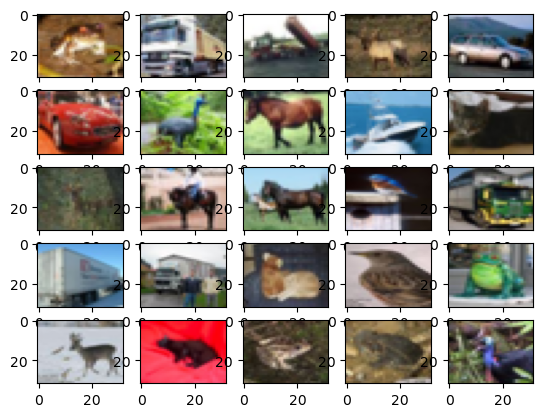

In [8]:
# Visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect="auto")
        k += 1

plt.show()

## **Classification**

### **CNN Model using Functional API**

In [9]:
# Number of classes
K = len(set(y_train))

# Calculate total number of classes for output layer
print("Number of classes:", K)

# Build the model using the Functional API
# Input Layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden Layer
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)

# Output Layer
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

# Model Description
model.summary()

Number of classes: 10


2024-04-10 21:16:35.934968: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     

In [10]:
# Compile
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [11]:
# We've already fit the data in the model
# Fit (50 epochs) --> for best accuracy
# r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

In [12]:
# Fit with Data Augmentation
# Note: if you run this AFTER calling the previous model.fit() it will CONTINUE training where it left off...
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(
    train_generator,
    validation_data=(x_test, y_test),
    steps_per_epoch=steps_per_epoch,
    epochs=20,
)

Epoch 1/20
1562/1562 [==============================] - 1203s 769ms/step - loss: 1.4437 - accuracy: 0.4950 - val_loss: 1.1454 - val_accuracy: 0.6111
Epoch 2/20
1562/1562 [==============================] - 1180s 756ms/step - loss: 0.9963 - accuracy: 0.6538 - val_loss: 0.8278 - val_accuracy: 0.7088
Epoch 3/20
1562/1562 [==============================] - 1178s 754ms/step - loss: 0.8472 - accuracy: 0.7085 - val_loss: 0.7551 - val_accuracy: 0.7436
Epoch 4/20
1562/1562 [==============================] - 1203s 771ms/step - loss: 0.7568 - accuracy: 0.7416 - val_loss: 0.7475 - val_accuracy: 0.7560
Epoch 5/20
1562/1562 [==============================] - 1201s 768ms/step - loss: 0.6922 - accuracy: 0.7656 - val_loss: 0.6550 - val_accuracy: 0.7780
Epoch 6/20
1562/1562 [==============================] - 1188s 761ms/step - loss: 0.6368 - accuracy: 0.7844 - val_loss: 0.6684 - val_accuracy: 0.7788
Epoch 7/20
1562/1562 [==============================] - 1208s 773ms/step - loss: 0.5984 - accuracy: 0.7964

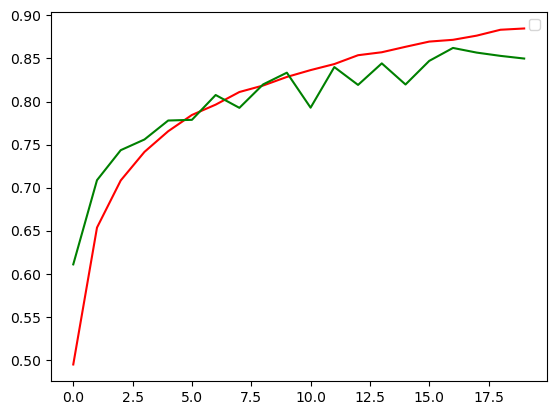

In [13]:
# Plot accuracy per iteration
plt.plot(r.history["accuracy"], label="acc", color="red")
plt.plot(r.history["val_accuracy"], label="val_acc", color="green")
plt.legend(labels=[])

In [14]:
# Assuming r.history is a dictionary containing 'accuracy' and 'val_accuracy' keys
# Create trace for training accuracy
trace_train_acc = go.Scatter(
    x=list(range(len(r.history["accuracy"]))),
    y=r.history["accuracy"],
    mode="lines",
    name="Training Accuracy",
    line=dict(color="red"),
)

# Create trace for validation accuracy
trace_val_acc = go.Scatter(
    x=list(range(len(r.history["val_accuracy"]))),
    y=r.history["val_accuracy"],
    mode="lines",
    name="Validation Accuracy",
    line=dict(color="green"),
)

# Create layout
layout = go.Layout(
    title="Accuracy per Iteration",
    xaxis=dict(title="Iteration"),
    yaxis=dict(title="Accuracy"),
)

# Create figure
fig = go.Figure(data=[trace_train_acc, trace_val_acc], layout=layout)

# Save the plot as HTML file
pio.write_html(fig, "accuracy_plot.html")

# Open the HTML file in a web browser
import webbrowser

webbrowser.open("accuracy_plot.html")

True

#### ***Model Saving***

In [17]:
# Save the model
model.save("first_classify_images.h5")

### **Mapping**

1/1 [==============================] - 0s 108ms/step
Original label is cat and predicted label is cat


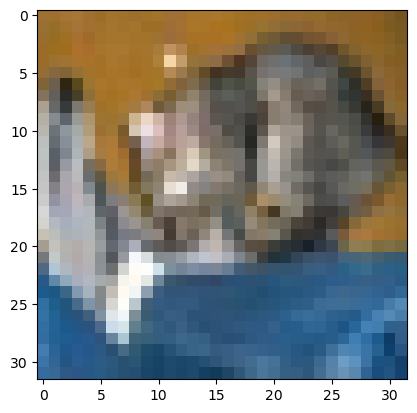

In [15]:
# Label Mapping

labels = """airplane automobile bird cat deer dog frog horse ship truck""".split()

# Select the image from our test dataset
image_number = 0

# Display the image
plt.imshow(x_test[image_number])

# Load the image in an array
n = np.array(x_test[image_number])

# Reshape it
p = n.reshape(1, 32, 32, 3)

# Pass in the network for prediction and save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# Load the original label
original_label = labels[y_test[image_number]]

# Display the result
print("Original label is {} and predicted label is {}".format(original_label, predicted_label))

1/1 [==============================] - 0s 19ms/step
Original label is airplane and predicted label is airplane


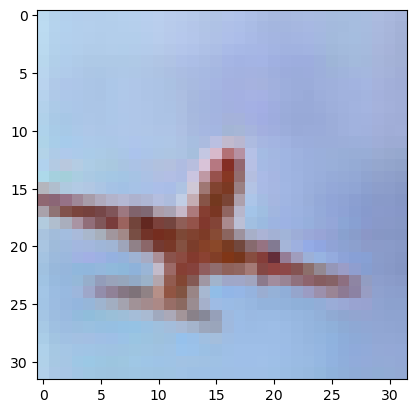

In [16]:
# Label Mapping

labels = """airplane automobile bird cat deer dog frog horse ship truck""".split()

# Select the image from our test dataset
image_number = 5722

# Display the image
plt.imshow(x_test[image_number])

# Load the image in an array
n = np.array(x_test[image_number])

# Reshape it
p = n.reshape(1, 32, 32, 3)

# Pass in the network for prediction and save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# Load the original label
original_label = labels[y_test[image_number]]

# Display the result
print("Original label is {} and predicted label is {}".format(original_label, predicted_label))

1/1 [==============================] - 0s 15ms/step
Original label is horse and predicted label is deer


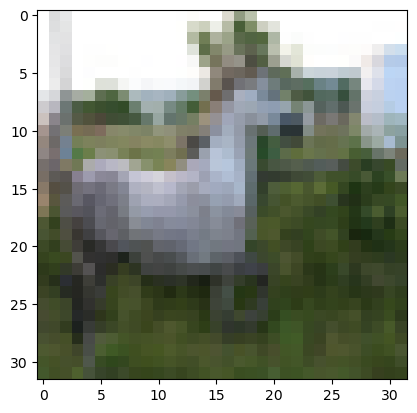

In [18]:
# Label Mapping

labels = """airplane automobile bird cat deer dog frog horse ship truck""".split()

# Select the image from our test dataset
image_number = 69

# Display the image
plt.imshow(x_test[image_number])

# Load the image in an array
n = np.array(x_test[image_number])

# Reshape it
p = n.reshape(1, 32, 32, 3)

# Pass in the network for prediction and save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# Load the original label
original_label = labels[y_test[image_number]]

# Display the result
print("Original label is {} and predicted label is {}".format(original_label, predicted_label))

1/1 [==============================] - 0s 19ms/step
Original label is deer and predicted label is deer


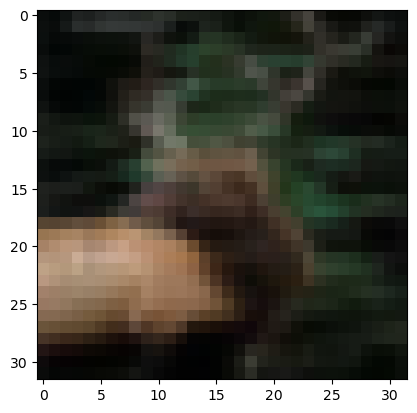

In [19]:
# Label Mapping

labels = """airplane automobile bird cat deer dog frog horse ship truck""".split()

# Select the image from our test dataset
image_number = 420

# Display the image
plt.imshow(x_test[image_number])

# Load the image in an array
n = np.array(x_test[image_number])

# Reshape it
p = n.reshape(1, 32, 32, 3)

# Pass in the network for prediction and save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# Load the original label
original_label = labels[y_test[image_number]]

# Display the result
print("Original label is {} and predicted label is {}".format(original_label, predicted_label))

1/1 [==============================] - 0s 22ms/step
Original label is automobile and predicted label is automobile


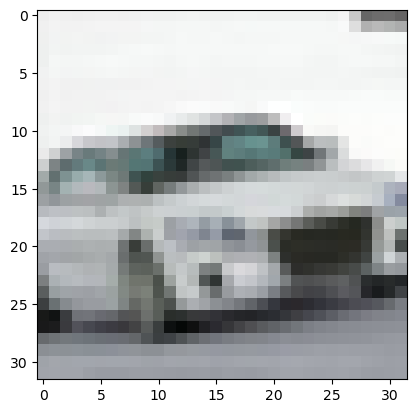

In [20]:
# Label Mapping

labels = """airplane automobile bird cat deer dog frog horse ship truck""".split()

# Select the image from our test dataset
image_number = 546

# Display the image
plt.imshow(x_test[image_number])

# Load the image in an array
n = np.array(x_test[image_number])

# Reshape it
p = n.reshape(1, 32, 32, 3)

# Pass in the network for prediction and save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# Load the original label
original_label = labels[y_test[image_number]]

# Display the result
print("Original label is {} and predicted label is {}".format(original_label, predicted_label))

1/1 [==============================] - 0s 21ms/step
Original label is ship and predicted label is ship


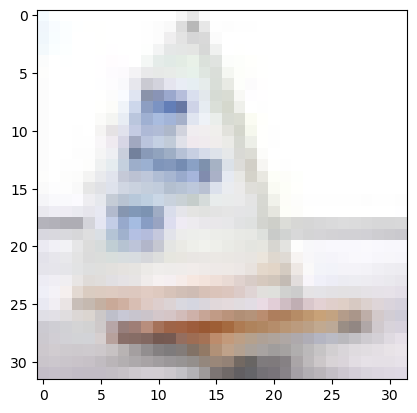

In [21]:
# Label Mapping

labels = """airplane automobile bird cat deer dog frog horse ship truck""".split()

# Select the image from our test dataset
image_number = 1164

# Display the image
plt.imshow(x_test[image_number])

# Load the image in an array
n = np.array(x_test[image_number])

# Reshape it
p = n.reshape(1, 32, 32, 3)

# Pass in the network for prediction and save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# Load the original label
original_label = labels[y_test[image_number]]

# Display the result
print("Original label is {} and predicted label is {}".format(original_label, predicted_label))

1/1 [==============================] - 0s 21ms/step
Original label is bird and predicted label is bird


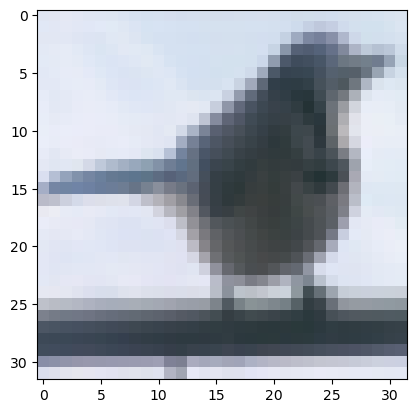

In [22]:
# Label Mapping

labels = """airplane automobile bird cat deer dog frog horse ship truck""".split()

# Select the image from our test dataset
image_number = 1768

# Display the image
plt.imshow(x_test[image_number])

# Load the image in an array
n = np.array(x_test[image_number])

# Reshape it
p = n.reshape(1, 32, 32, 3)

# Pass in the network for prediction and save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# Load the original label
original_label = labels[y_test[image_number]]

# Display the result
print("Original label is {} and predicted label is {}".format(original_label, predicted_label))

1/1 [==============================] - 0s 21ms/step
Original label is deer and predicted label is deer


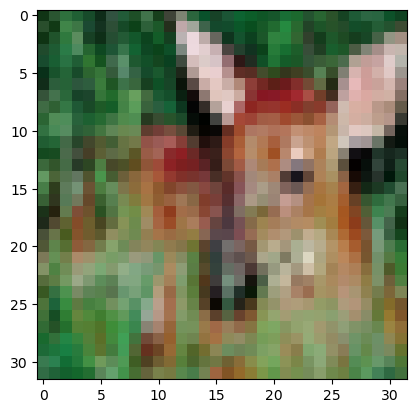

In [23]:
# Label Mapping

labels = """airplane automobile bird cat deer dog frog horse ship truck""".split()

# Select the image from our test dataset
image_number = 2786

# Display the image
plt.imshow(x_test[image_number])

# Load the image in an array
n = np.array(x_test[image_number])

# Reshape it
p = n.reshape(1, 32, 32, 3)

# Pass in the network for prediction and save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# Load the original label
original_label = labels[y_test[image_number]]

# Display the result
print("Original label is {} and predicted label is {}".format(original_label, predicted_label))

1/1 [==============================] - 0s 21ms/step
Original label is ship and predicted label is ship


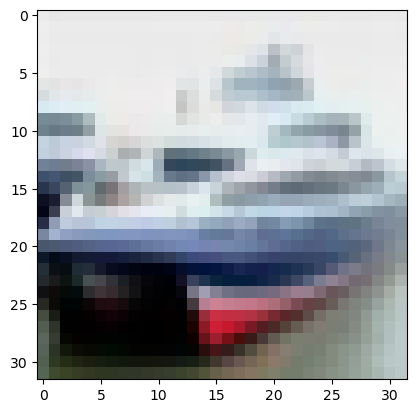

In [24]:
# Label Mapping

labels = """airplane automobile bird cat deer dog frog horse ship truck""".split()

# Select the image from our test dataset
image_number = 1

# Display the image
plt.imshow(x_test[image_number])

# Load the image in an array
n = np.array(x_test[image_number])

# Reshape it
p = n.reshape(1, 32, 32, 3)

# Pass in the network for prediction and save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# Load the original label
original_label = labels[y_test[image_number]]

# Display the result
print("Original label is {} and predicted label is {}".format(original_label, predicted_label))

1/1 [==============================] - 0s 20ms/step
Original label is truck and predicted label is truck


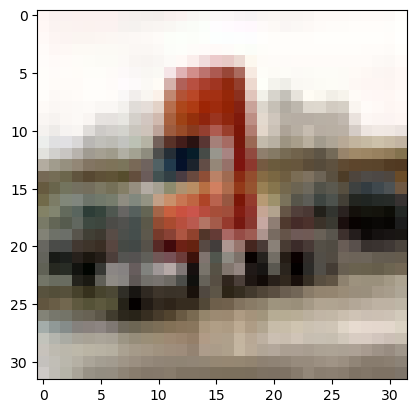

In [25]:
# Label Mapping

labels = """airplane automobile bird cat deer dog frog horse ship truck""".split()

# Select the image from our test dataset
image_number = 5720

# Display the image
plt.imshow(x_test[image_number])

# Load the image in an array
n = np.array(x_test[image_number])

# Reshape it
p = n.reshape(1, 32, 32, 3)

# Pass in the network for prediction and save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# Load the original label
original_label = labels[y_test[image_number]]

# Display the result
print("Original label is {} and predicted label is {}".format(original_label, predicted_label))

## **Classification and Simultaneous Segmentation**

### **CIFAR-10 Dataset**

In [28]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Define CNN model
model = models.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

# Compile and train the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

Epoch 1/20
782/782 [==============================] - 106s 135ms/step - loss: 1.5926 - accuracy: 0.4174 - val_loss: 1.3498 - val_accuracy: 0.5059
Epoch 2/20
782/782 [==============================] - 100s 128ms/step - loss: 1.2334 - accuracy: 0.5594 - val_loss: 1.1701 - val_accuracy: 0.5835
Epoch 3/20
782/782 [==============================] - 91s 116ms/step - loss: 1.0962 - accuracy: 0.6128 - val_loss: 1.0554 - val_accuracy: 0.6263
Epoch 4/20
782/782 [==============================] - 110s 141ms/step - loss: 0.9919 - accuracy: 0.6521 - val_loss: 0.9877 - val_accuracy: 0.6523
Epoch 5/20
782/782 [==============================] - 97s 125ms/step - loss: 0.9173 - accuracy: 0.6800 - val_loss: 0.9753 - val_accuracy: 0.6581
Epoch 6/20
782/782 [==============================] - 100s 128ms/step - loss: 0.8606 - accuracy: 0.6973 - val_loss: 0.9207 - val_accuracy: 0.6820
Epoch 7/20
782/782 [==============================] - 91s 116ms/step - loss: 0.8100 - accuracy: 0.7178 - val_loss: 0.9119 - va

In [29]:
# Save the model
model.save("classify_images.h5")

### **U-Net Model for Segmentation**

In [30]:
# Define U-Net Model for Segmentation
def unet_model():
    inputs = layers.Input((32, 32, 3))
    conv1 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(inputs)
    conv1 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(pool1)
    conv2 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(pool2)
    conv3 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    up4 = layers.concatenate(
        [
            layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same")(conv3),
            conv2,
        ],
        axis=3,
    )
    conv4 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(up4)
    conv4 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(conv4)

    up5 = layers.concatenate(
        [
            layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same")(conv4),
            conv1,
        ],
        axis=3,
    )
    conv5 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(up5)
    conv5 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(conv5)

    outputs = layers.Conv2D(10, (1, 1), activation="softmax")(conv5)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model


# Assuming we have x_train, y_train, x_test, y_test ready, here, we'll just create dummy data for demonstration purposes...
x_train = np.random.rand(1000, 32, 32, 3)
y_train = np.random.randint(0, 10, (1000, 32, 32))  # Dummy integer masks
x_test = np.random.rand(200, 32, 32, 3)
y_test = np.random.randint(0, 10, (200, 32, 32))  # Dummy integer masks

# Convert target labels to one-hot encoded masks
num_classes = 10
y_train_one_hot = np.eye(num_classes)[y_train]
y_test_one_hot = np.eye(num_classes)[y_test]

# Create and compile the model
model = unet_model()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(
    x_train,
    y_train_one_hot,
    epochs=20,
    batch_size=64,
    validation_data=(x_test, y_test_one_hot),
)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print("Test accuracy:", test_acc)

Epoch 1/20
16/16 [==============================] - 13s 732ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3026 - val_accuracy: 0.1002
Epoch 2/20
16/16 [==============================] - 11s 731ms/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.1002
Epoch 3/20
16/16 [==============================] - 14s 915ms/step - loss: 2.3026 - accuracy: 0.1013 - val_loss: 2.3026 - val_accuracy: 0.1005
Epoch 4/20
16/16 [==============================] - 16s 997ms/step - loss: 2.3025 - accuracy: 0.1018 - val_loss: 2.3026 - val_accuracy: 0.0994
Epoch 5/20
16/16 [==============================] - 12s 756ms/step - loss: 2.3025 - accuracy: 0.1023 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
16/16 [==============================] - 16s 970ms/step - loss: 2.3024 - accuracy: 0.1027 - val_loss: 2.3026 - val_accuracy: 0.1005
Epoch 7/20
16/16 [==============================] - 12s 788ms/step - loss: 2.3023 - accuracy: 0.1037 - val_loss: 2.3027 - val_accuracy: 0.0999

In [31]:
def jaccard_index(y_true, y_pred):
    intersection = np.sum(np.logical_and(y_true, y_pred))
    union = np.sum(np.logical_or(y_true, y_pred))
    return intersection / union


# Predict on test data
y_pred = model.predict(x_test)

# Convert predictions and ground truth masks to binary masks
y_pred_binary = np.argmax(y_pred, axis=-1)
y_test_binary = np.argmax(y_test_one_hot, axis=-1)

# Calculate Jaccard index
jaccard = jaccard_index(y_test_binary, y_pred_binary)
print("Jaccard Index:", jaccard)

7/7 [==============================] - 0s 39ms/step
Jaccard Index: 0.7803774669381971


In [32]:
# Save the model
model.save("segment_images.h5")

### **Predictions and Segmentation Masking**

1/1 [==============================] - 0s 161ms/step


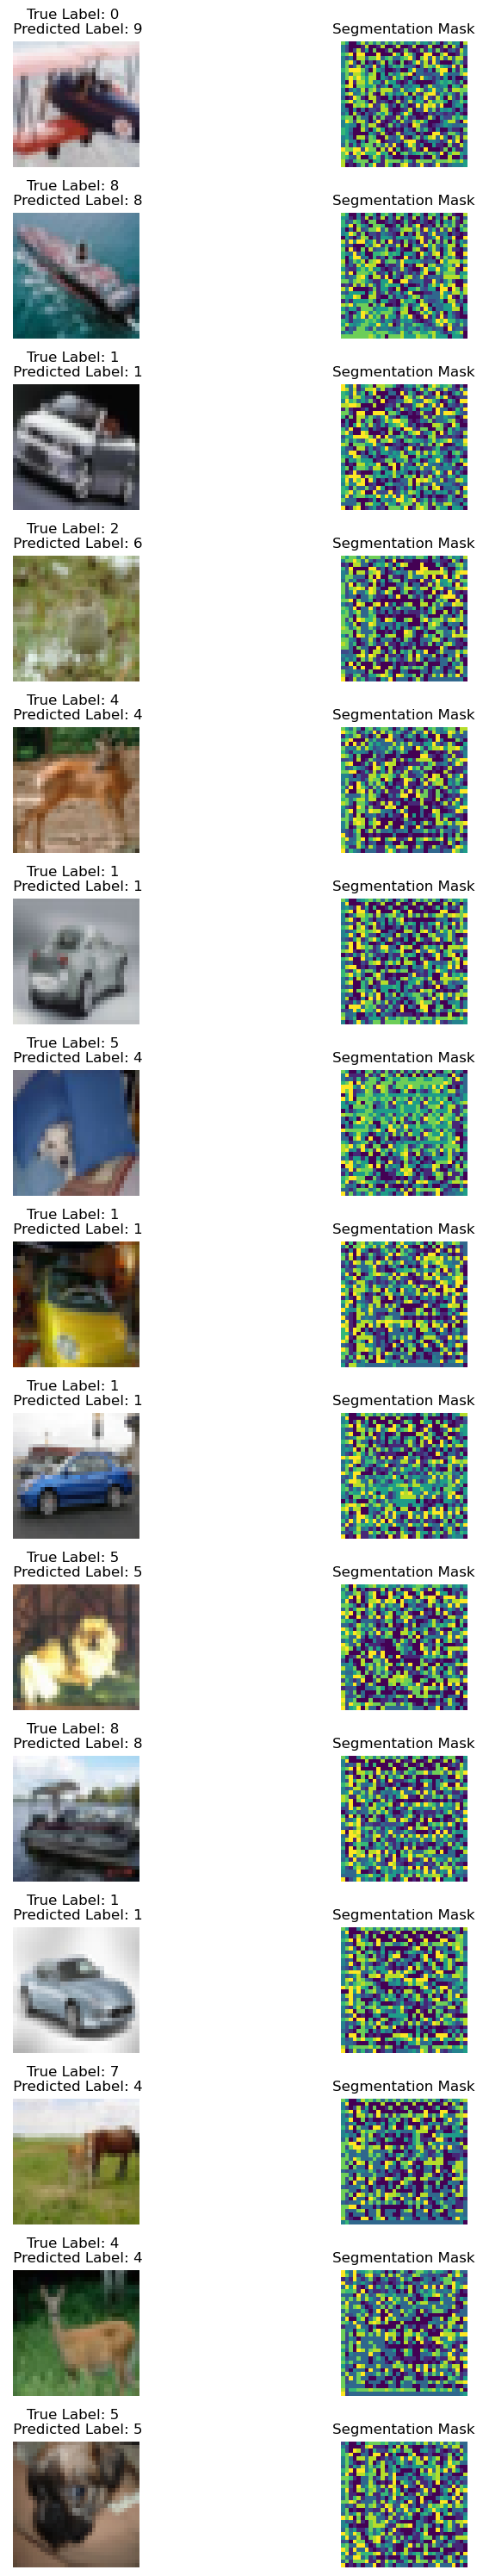

In [33]:
# Load CIFAR-10 dataset
(_, _), (x_test, y_test) = cifar10.load_data()
x_test = x_test / 255.0  # Normalize pixel values

# Load trained classification model
classification_model = load_model("classify_images.h5")

# Load trained segmentation model
segmentation_model = load_model("segment_images.h5")

# Sample some random images
num_samples = 15
sample_indices = np.random.randint(0, len(x_test), size=num_samples)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

# Classification predictions
classification_predictions = classification_model.predict(sample_images)
classification_labels = np.argmax(classification_predictions, axis=1)

# Segmentation predictions
segmentation_predictions = segmentation_model.predict(sample_images)
segmentation_masks = np.argmax(segmentation_predictions, axis=3)

# Display results
fig, axes = plt.subplots(num_samples, 2, figsize=(10, 2 * num_samples))

for i in range(num_samples):
    axes[i, 0].imshow(sample_images[i])
    axes[i, 0].set_title(
        f"True Label: {sample_labels[i][0]} \n Predicted Label: {classification_labels[i]}"
    )
    axes[i, 0].axis("off")

    axes[i, 1].imshow(segmentation_masks[i], cmap="viridis")
    axes[i, 1].set_title("Segmentation Mask")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()